In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
! pip install -Uqq fastbook
import fastbook
from fastbook import *
from fastai.vision.widgets import *
from fastai.vision.all import *

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [4]:
! pip install duckduckgo_search

from duckduckgo_search import DDGS

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    with DDGS() as ddgs:
        search_results = ddgs.images(keywords=term)
        image_urls = [next(search_results).get("image") for _ in range(max_images)]
        return L(image_urls)

bear_types = 'grizzly','black','teddy'
path = Path('bears')
from time import sleep
for o in bear_types:
       dest = (path/o)
       dest.mkdir(exist_ok=True, parents=True)
       download_images(dest, urls=search_images_ddg(f'{o} bear photo', max_images=100))
       sleep(10)
       resize_images(path/o, max_size=400, dest=path/o)
fns = get_image_files(path)
fns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 48.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: orjson
    Found existing installation: orjson 3.9.10
    Uninstalling orjson-3.9.10:
      Successfully uninstalled orjson-3.9.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.26.4 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 15.0.2 which is incompatible.


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


(#286) [Path('bears/grizzly/af96e246-58c8-49c6-98e2-f80367a14c53.jpg'),Path('bears/grizzly/aa791358-70a3-4da2-9cd5-0ca36a226179.jpg'),Path('bears/grizzly/b70f1990-fe07-4883-9588-967a399444fc.jpg'),Path('bears/grizzly/e4888393-4253-48ce-9b15-948020c7a807.jpg'),Path('bears/grizzly/d49a0d73-44b9-42e7-8e76-40b7ddbd8756.jpg'),Path('bears/grizzly/cecd1c3e-a76d-4175-a7c7-3b595d353792.png'),Path('bears/grizzly/e0af3a5b-a376-4a69-9e6d-c8c401520cac.jpg'),Path('bears/grizzly/2f47fa40-505f-4d14-9514-c1e2b71d0f81.jpg'),Path('bears/grizzly/7a189248-0306-4971-ab48-05ddcd12fb7d.jpg'),Path('bears/grizzly/8b64634a-34d9-4897-a3b7-46e8755634fc.jpg')...]

In [10]:
#have to delete failed files
failed = verify_images(fns)
failed

(#6) [Path('bears/grizzly/629151b3-5d79-4d8f-81e3-189316ed4e5f.JPG'),Path('bears/black/c48ecf0b-bb9c-43e6-9d55-76ad621b6ed2.jpg'),Path('bears/teddy/ac5e9755-3c72-4a9b-81f5-1f745fa09f60.jpg'),Path('bears/teddy/34a05509-0a1d-4e77-8b98-71dc0978461a.jpg'),Path('bears/teddy/7b20ecbb-b0c8-4238-97c9-4a03ccb8edd4.jpg'),Path('bears/teddy/02141eff-21f1-4741-b5fa-04ecb3a5fe9c.jpg')]

In [11]:
failed.map(Path.unlink);

In [12]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [13]:
dls = bears.dataloaders(path)

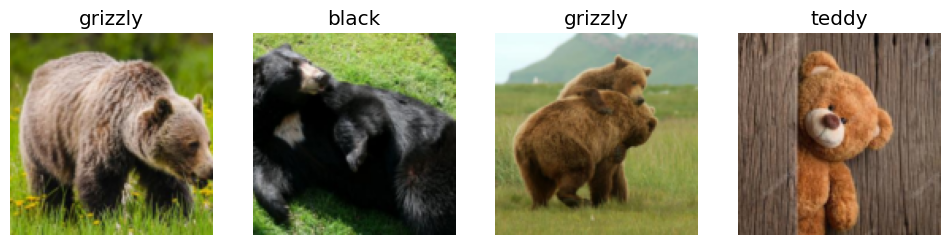

In [14]:
dls.valid.show_batch(max_n=4, nrows=1)

In [15]:
#train model
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [16]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.545962,0.186134,0.035714,00:35


epoch,train_loss,valid_loss,error_rate,time
0,0.315857,0.030173,0.000000,00:48
1,0.207755,0.005248,0.000000,00:49
2,0.143068,0.006825,0.000000,00:49
3,0.114664,0.008082,0.000000,00:47


In [17]:
#save and export model for production use
learn.export()

In [18]:
#check if above file got exported
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [19]:
path = Path()
learn_inf = load_learner(path/'export.pkl', cpu=True)
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()

In [20]:
def on_data_change(change):
    lbl_pred.value = ''
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

In [21]:
btn_upload.observe(on_data_change, names=['data'])

In [22]:
display(VBox([widgets.Label('Select your bear!'), btn_upload, out_pl, lbl_pred]))